# Problem Statement:
**The dataset is in zipped format. We have to extract the dataset in the program,
visualize the number of male and female babies born in a particular year, and
find out popular baby names.


**Description:
This project not only focuses on implementing data manipulation and data
visualization using pandas library but also tests your ability to deal with real word
problem statements

**Dataset:
Popular baby names data provided by the Social Security Administration (SSA)
of the United States.

**Hints:
● First, use pandas, zipfile and BytesIO library to extract the data. Find out a
way to extract only files that consist of useful data
● Hint: pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8',
engine='python', header=None)
● Then, visualize the number of male and female babies born in a particular
year with the help of pandas. DataFrame.plot, then analyze baby names
by sorting out all birth counts
● Then, analyze baby names by sorting out top 100 birth counts and group
them by names to find out popular baby names


In [20]:
from io import BytesIO
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [23]:
a=ZipFile("names.zip").extractall('.')

a

In [24]:
years = []
for year in range(1880, 2021):
    years.append(pd.read_csv(f'yob{year}.txt', names = ['Name', 'Sex', 'Babies']))
    years[-1]['Year'] = year

In [25]:
b=pd.concat(years)
b

,Name,Sex,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31512,Zykier,M,5,2020
31513,Zylus,M,5,2020
31514,Zymari,M,5,2020
31515,Zyn,M,5,2020


In [26]:
c=pd.pivot_table(data=b,index=['Year'],columns=['Sex'],values=['Babies'],aggfunc='sum')
c

Babies         
Sex         F        M
Year                  
1880    90994   110490
1881    91953   100737
1882   107847   113686
1883   112320   104625
1884   129019   114442
...       ...      ...
2016  1770086  1895774
2017  1724262  1848496
2018  1698373  1813377
2019  1675139  1790682
2020  1612393  1721588

[141 rows x 2 columns]

<Figure size 1000x3000 with 0 Axes>

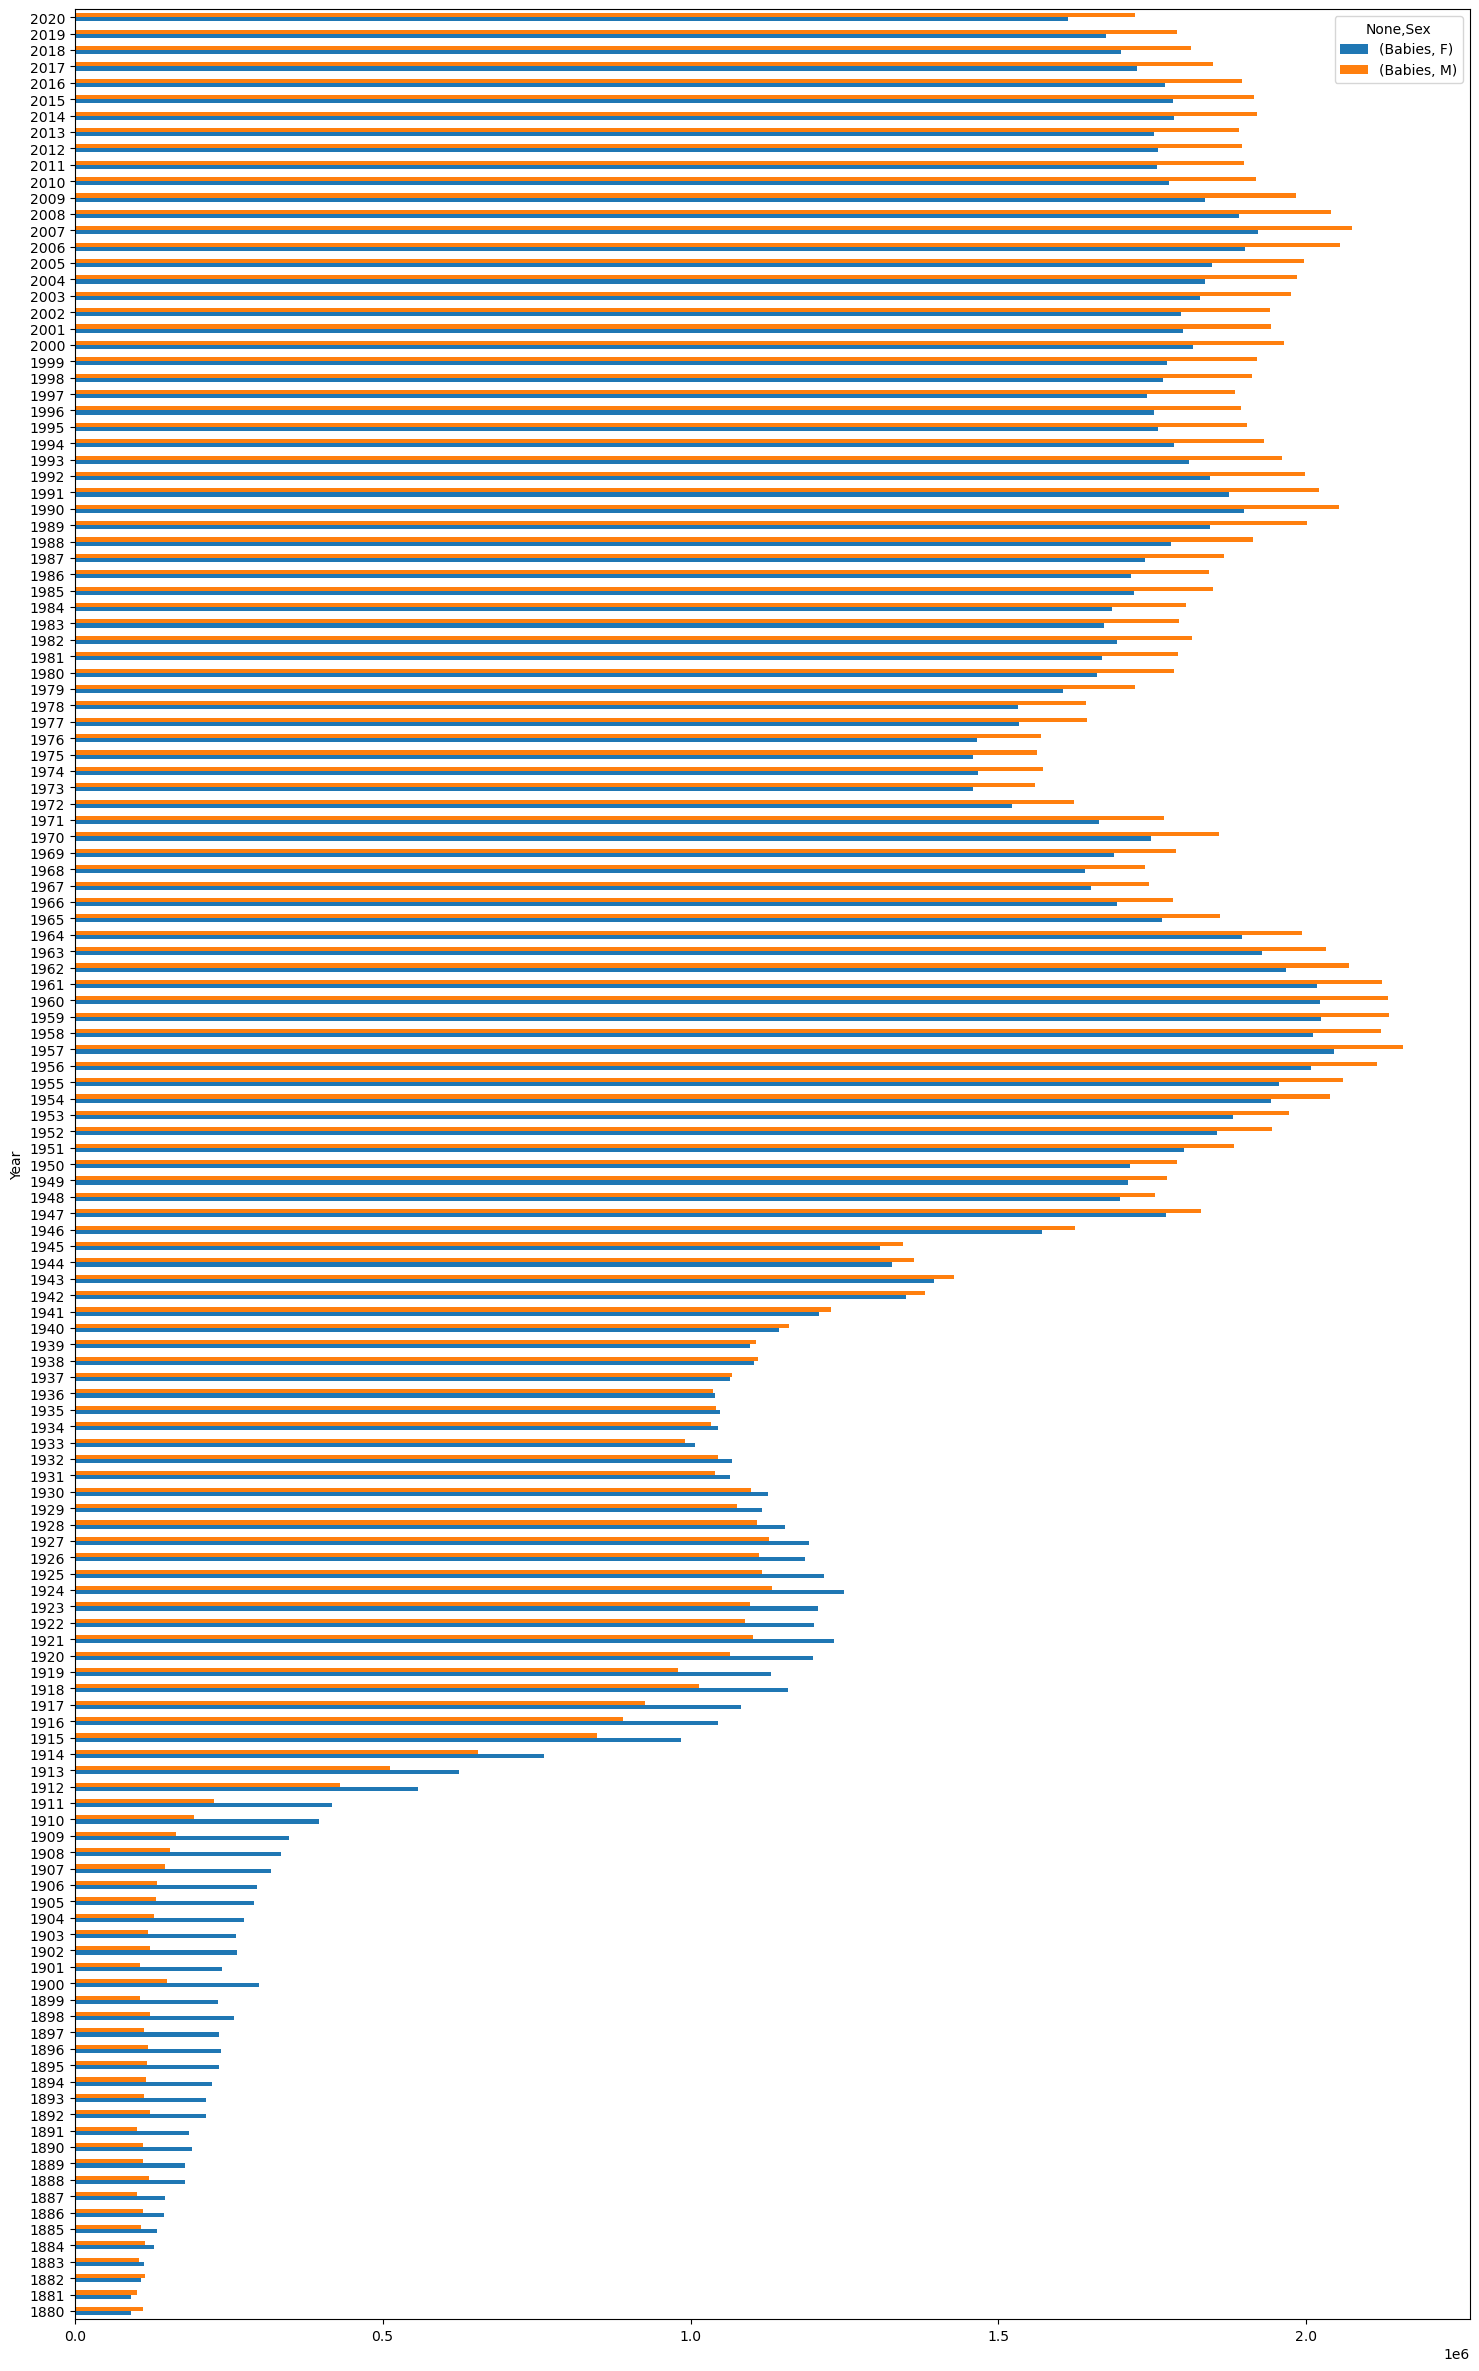

In [27]:
plt.figure(figsize=(10,30))
c.plot(kind='barh', figsize=(18,30));
plt.show()

In [28]:
pd.options.display.max_rows=100
sort_baby_names = b.sort_values(by='Babies', ascending=False).reset_index(drop=True)
sort_baby_names.head(100)

,Name,Sex,Babies,Year
0,Linda,F,99693,1947
1,Linda,F,96215,1948
2,James,M,94758,1947
3,Michael,M,92785,1957
4,Robert,M,91650,1947
5,Linda,F,91017,1949
6,Michael,M,90696,1956
7,Michael,M,90567,1958
8,James,M,88600,1948
9,Michael,M,88565,1954


In [29]:
top_100_names = sort_baby_names.head(100)
grouped_names = top_100_names[['Name', 'Babies']].groupby('Name').sum().sort_values(by='Babies', ascending=False)
grouped_names

,Babies
Name,
James,1808577
Michael,1768220
John,1525040
Robert,1467473
David,978124
Linda,441337
Mary,219694
